In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('Sentiment-1.csv')

In [30]:
#df = pd.read_csv('D:/NLP_DataSets/Sentiment_Analysis/TwitterSA/test.csv')

In [3]:
df.head(1)

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito


In [4]:
df.shape

(13871, 21)

In [5]:
df1 = df[['text', 'sentiment']]

In [6]:
df1.head(1)

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral


In [8]:
df1.shape

(13871, 2)

In [7]:
df1.isnull().sum()

text         0
sentiment    0
dtype: int64

In [9]:
# Sentiment = []
# for e in df1['sentiment']:
    
#     if e=='Positive':     # or e=='Neutral':
#          Sentiment.append('positive')
#     else:
#          Sentiment.append('negative')
# df1['sentiment'] = Sentiment

In [10]:
df1 = df1[df1.sentiment != "Neutral"]

In [18]:
df1 = df1.reset_index()

In [20]:
df1 = df1.drop('index', axis=1)

In [24]:
df1.head(2)

,text,sentiment
0,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
1,RT @RobGeorge: That Carly Fiorina is trending ...,Positive


In [25]:
df1.shape

(10729, 2)

C:\Users\bapan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


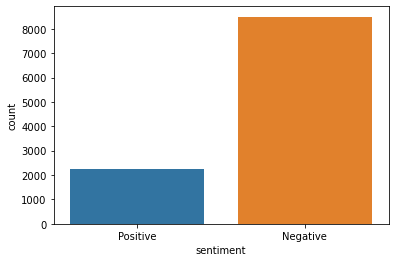

In [26]:
sns.countplot(df1.sentiment)
plt.show()

In [27]:
train_data = df1

In [28]:
Tweet = train_data.text

In [29]:
Tweet[0]

"RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…"

In [30]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Masking, Bidirectional

In [31]:
from nltk.tokenize import RegexpTokenizer

In [32]:
data_list = list()
for comp in Tweet:
    data_list.append(RegexpTokenizer('\w+').tokenize(comp))

In [33]:
len(data_list)

10729

In [34]:
data_list[2]

['RT',
 'DanScavino',
 'GOPDebate',
 'w',
 'realDonaldTrump',
 'delivered',
 'the',
 'highest',
 'ratings',
 'in',
 'the',
 'history',
 'of',
 'presidential',
 'debates',
 'Trump2016',
 'http',
 't',
 'co']

In [35]:
low = []
for line in data_list:
    lines = list(map(lambda x: x.lower(), line))
    low.append(lines)

In [36]:
low[5]

['deer',
 'in',
 'the',
 'headlights',
 'rt',
 'lizzwinstead',
 'ben',
 'carson',
 'may',
 'be',
 'the',
 'only',
 'brain',
 'surgeon',
 'who',
 'has',
 'performed',
 'a',
 'lobotomy',
 'on',
 'himself',
 'gopdebate']

In [37]:
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize

In [38]:
stop_words =  list(punctuation) + stopwords.words('english')  
stop_words.remove('no')
stop_words.remove('not')
stop_words.remove("wasn't")
stop_words.remove("shouldn't")
stop_words.remove("isn't")
stop_words.remove("haven't")
stop_words.remove("down")
stop_words.remove("off")
stop_words.remove("aren't")
stop_words.remove("couldn't")
stop_words.remove("doesn't")
stop_words.remove("only")
stop_words.remove("most")
stop_words.remove("over")
stop_words.remove("under")
stop_words.remove("such")
stop_words.remove("too")
stop_words.remove("few")
stop_words.remove("against")
stop_words.remove("if")

def tokenize(words):
    #words = word_tokenize(text)
    #words = [w.lower() for w in words]
    return [w for w in words if w not in stop_words]

In [39]:
stop_words

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'in',
 '

In [40]:
filtered_sentiment = []
for file_id in low:
    words = tokenize(file_id)
    filtered_sentiment.append(words)
    

In [41]:
filtered_sentiment[2]

['rt',
 'danscavino',
 'gopdebate',
 'w',
 'realdonaldtrump',
 'delivered',
 'highest',
 'ratings',
 'history',
 'presidential',
 'debates',
 'trump2016',
 'http',
 'co']

In [42]:
print(len(filtered_sentiment))
print(len(low))

10729
10729


In [43]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bapan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
lmtzr = WordNetLemmatizer()

In [45]:
lemmatized = []
for line in filtered_sentiment:
    lines = list(map(lambda x: lmtzr.lemmatize(x), line))
    lemmatized.append(lines)

In [46]:
lemmatized[2]

['rt',
 'danscavino',
 'gopdebate',
 'w',
 'realdonaldtrump',
 'delivered',
 'highest',
 'rating',
 'history',
 'presidential',
 'debate',
 'trump2016',
 'http',
 'co']

In [47]:
len(lemmatized)

10729

In [48]:
final_X = lemmatized

In [49]:
sent = []
for row in final_X:
    seq = ''
    for word in row:
        seq = seq + ' ' + word
    sent.append(seq)

In [50]:
final_X = pd.Series(sent)

In [51]:
print(final_X[1])

 rt robgeorge carly fiorina trending hour debate men completed gopdebate say


In [52]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [53]:
vocabsize = 5000
tokenizer = Tokenizer(num_words = vocabsize, split=' ')
tokenizer.fit_on_texts(final_X.values)
X = tokenizer.texts_to_sequences(final_X.values)
X = pad_sequences(X)

In [54]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [55]:
y = pd.get_dummies(train_data['sentiment']).values

In [56]:
y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

In [57]:
train_data['sentiment']

0        Positive
1        Positive
2        Positive
3        Positive
4        Negative
           ...   
10724    Negative
10725    Positive
10726    Positive
10727    Negative
10728    Positive
Name: sentiment, Length: 10729, dtype: object

In [58]:
X_train, X_val, y_train, y_val = train_test_split(
                                       X, y, test_size=0.15, random_state=64)

In [59]:
print(X_train.shape)
print(X_val.shape)

(9119, 24)
(1610, 24)


In [60]:
X_train[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    2,   58,  361,  238,  265,  915,    1, 1938,
          4,    5])

In [75]:
embed_dim = 50
#lstm_out = 296
model = Sequential()
model.add(Embedding(vocabsize, embed_dim, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
#model.add(LSTM(196, dropout=0.4, return_sequences=True))
model.add(LSTM(196, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

In [76]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy'])

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 24, 50)            250000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 24, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 196)               193648    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 394       
Total params: 444,042
Trainable params: 444,042
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=5)

Epoch 1/5
285/285 [==============================] - 16s 49ms/step - loss: 0.4341 - accuracy: 0.8164 - val_loss: 0.3173 - val_accuracy: 0.8727
Epoch 2/5
285/285 [==============================] - 12s 43ms/step - loss: 0.3026 - accuracy: 0.8728 - val_loss: 0.3289 - val_accuracy: 0.8696
Epoch 3/5
285/285 [==============================] - 12s 42ms/step - loss: 0.2553 - accuracy: 0.8948 - val_loss: 0.3214 - val_accuracy: 0.8739
Epoch 4/5
285/285 [==============================] - 12s 43ms/step - loss: 0.2226 - accuracy: 0.9087 - val_loss: 0.3282 - val_accuracy: 0.8627
Epoch 5/5
285/285 [==============================] - 12s 42ms/step - loss: 0.1972 - accuracy: 0.9213 - val_loss: 0.3381 - val_accuracy: 0.8621


In [79]:
import numpy as np

In [80]:
twts = ['''We are secular not because the word was added in our constitition.
           Secularism is in our blood.''']
       #['I use emotion for the many and reason for the few']]
#vectorizing the tweet by the pre-fitted tokenizer instance
twts = tokenizer.texts_to_sequences(twts)
#padding the tweet to have exactly the same shape as `embedding_2` input
twts = pad_sequences(twts, maxlen=28, dtype='int32', value=0)
print(twts)
sentiment = model.predict(twts,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0 2593    9  157 4069 1636]]
1/1 - 0s
negative


In [81]:
sentiment

array([0.9924434 , 0.00755663], dtype=float32)

In [82]:
twts = ['''Modi talked about Swiss money but did nothing.
       Internally also he only harassed people with what chidambaram called demonization, 
       making the poor and middle class suffer for nothing.''']
       #['I use emotion for the many and reason for the few']]
#vectorizing the tweet by the pre-fitted tokenizer instance
twts = tokenizer.texts_to_sequences(twts)
#padding the tweet to have exactly the same shape as `embedding_2` input
twts = pad_sequences(twts, maxlen=28, dtype='int32', value=0)
print(twts)
sentiment = model.predict(twts,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0  796   84  264  417 2769   52   21  361  344  394  779  422  264]]
1/1 - 0s
negative


In [83]:
sentiment 

array([0.9686854 , 0.03131463], dtype=float32)

In [84]:
pred_senti = []

for i in X_val:
    #print(i)
    Senti = model.predict(i.reshape(1,-1), batch_size = 1)[0]
    if np.argmax(Senti) == 0:
        pred_senti.append('negative')
    else:
        pred_senti.append('positive')
        

In [85]:
pred_senti[30:50]

['negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative']

In [72]:
y_val[10:20]

array([[1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [58]:
!pip install afinn

  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53455 sha256=d94e8fc27c78736475f9e0b3f58ada181443d30effcb9b6e2b167383180a5d63
  Stored in directory: c:\users\bapan\appdata\local\pip\cache\wheels\f6\6f\c3\b305c5107a17618f2938a067d5ffcbb556909d82398762089e
Successfully built afinn


In [58]:
from afinn import Afinn

In [59]:
af = Afinn()

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train_af, X_val_af = train_test_split(
                                   final_X, test_size=0.15, random_state=111)

In [62]:
X_train_af.shape, X_val_af.shape

((11790,), (2081,))

In [63]:
X_train_af[10]

' jgreendc realdonaldtrump in all fairness billclinton owns that phrase gopdebate'

In [64]:
X_val_af[0]

' rt nancyleegrahn how did everyone feel about the climate change question last night exactly gopdebate'

In [65]:
sentiment_scores = [af.score(tweet) for tweet in X_val_af]

In [67]:
#sentiment_scores

In [68]:
an = ['positive' if score > 0 else 'negative' for score in sentiment_scores]

In [69]:
actual = []
for i in range(len(y_val)):
    if y_val[i][1] == 1:
        actual.append('positive')
    else:
        actual.append('negative')

In [70]:
test_df = pd.DataFrame()
test_df['Actual Sentiment'] = actual
test_df['LSTM_Sentiment'] = pred_senti
test_df['Auto_Sentiment'] = an

In [71]:
test_df.head(10)

,Actual Sentiment,LSTM_Sentiment,Auto_Sentiment
0,negative,negative,negative
1,negative,positive,positive
2,positive,positive,positive
3,negative,positive,negative
4,positive,negative,negative
5,positive,positive,negative
6,negative,negative,positive
7,negative,positive,negative
8,positive,positive,negative
9,negative,negative,positive


In [72]:
confusion_df1 = pd.crosstab(test_df['Actual Sentiment'], test_df['LSTM_Sentiment'], rownames=['Actual'], colnames=['predicted'], margins=True)

In [73]:
confusion_df1

predicted,negative,positive,All
Actual,,,
negative,1010,284,1294
positive,308,479,787
All,1318,763,2081


In [74]:
confusion_df2 = pd.crosstab(test_df['Actual Sentiment'], test_df['Auto_Sentiment'], rownames=['Actual'], colnames=['predicted'], margins=True)

In [75]:
confusion_df2

predicted,negative,positive,All
Actual,,,
negative,876,418,1294
positive,418,369,787
All,1294,787,2081
